In [2]:
import pandas as pd

df = pd.read_csv('train_data.csv')
df.head()

,trafficSource.isTrueDirect,purchaseValue,browser,device.screenResolution,trafficSource.adContent,trafficSource.keyword,screenSize,geoCluster,trafficSource.adwordsClickInfo.slot,device.mobileDeviceBranding,...,device.language,deviceType,userChannel,device.browserVersion,totalHits,device.screenColors,sessionStart,geoNetwork.continent,device.isMobile,new_visits
0,NaN,0.0,Edge,not available in demo dataset,NaN,NaN,medium,Region_2,NaN,not available in demo dataset,...,not available in demo dataset,desktop,Social,not available in demo dataset,1,not available in demo dataset,1500100799,Americas,False,1.0
1,True,0.0,Chrome,not available in demo dataset,NaN,NaN,medium,Region_3,NaN,not available in demo dataset,...,not available in demo dataset,desktop,Direct,not available in demo dataset,1,not available in demo dataset,1495262065,Americas,False,1.0
2,True,0.0,Chrome,not available in demo dataset,NaN,(not provided),medium,Region_2,NaN,not available in demo dataset,...,not available in demo dataset,desktop,Organic Search,not available in demo dataset,6,not available in demo dataset,1508510328,Europe,False,NaN
3,NaN,0.0,Internet Explorer,not available in demo dataset,NaN,NaN,medium,Region_4,NaN,not available in demo dataset,...,not available in demo dataset,desktop,Social,not available in demo dataset,1,not available in demo dataset,1483431838,Asia,False,1.0
4,True,88950000.0,Chrome,not available in demo dataset,NaN,NaN,medium,Region_3,NaN,not available in demo dataset,...,not available in demo dataset,desktop,Direct,not available in demo dataset,66,not available in demo dataset,1475804633,Americas,False,1.0


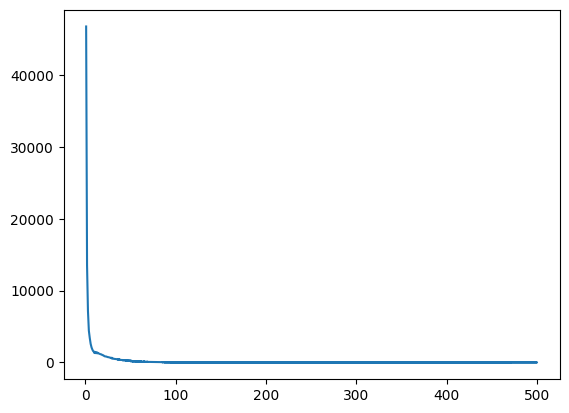

In [3]:
import matplotlib.pyplot as plt

plt.plot(df['totalHits'].value_counts())

In [4]:
print(df[df['device.isMobile']][['pageViews','totalHits','purchaseValue']].corr())

               pageViews  totalHits  purchaseValue
pageViews       1.000000   0.979995       0.371221
totalHits       0.979995   1.000000       0.361609
purchaseValue   0.371221   0.361609       1.000000


In [5]:
print(23985*0.7)

16789.5


In [8]:
L = (df['purchaseValue']-df['purchaseValue'].mean())/df['purchaseValue'].std()
print(L.std())

1.0


In [15]:
from sklearn.linear_model import LinearRegression
flag = ~((df['pageViews'].isna()) | (df['totalHits'].isna()))
L = LinearRegression().fit(df[flag][['pageViews','totalHits']],df[flag]['purchaseValue']).coef_
print(L)

[ 138914.15485587 2530317.11936839]


In [6]:
df['totals.bounces'].isna().sum()/df.shape[0]

0.5936322970445516